# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [128]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [129]:
# Your code to explore data and train a regression model
numeric_features = ['house_age', 'transit_distance', 'latitude', 'longitude']
data[numeric_features + ['price_per_unit']].describe()

,house_age,transit_distance,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,37.980193
std,11.392485,1262.109595,0.012410,0.015347,13.606488
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,9.025000,289.324800,24.963000,121.528085,27.700000
50%,16.100000,492.231300,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,25.014590,121.566270,117.500000


In [130]:
import numpy as np
import pandas as pd
data['month'], data['year'] = np.modf(data['transaction_date'])
data['month'] = data['month'] * 12
data['year'].round()
data.month = data.month.astype(int)+1
data.year = data.year.astype(int)
data.describe

<bound method NDFrame.describe of      transaction_date  house_age  transit_distance  local_convenience_stores  \
0            2012.917       32.0          84.87882                        10   
1            2012.917       19.5         306.59470                         9   
2            2013.583       13.3         561.98450                         5   
3            2013.500       13.3         561.98450                         5   
4            2012.833        5.0         390.56840                         5   
..                ...        ...               ...                       ...   
409          2013.000       13.7        4082.01500                         0   
410          2012.667        5.6          90.45606                         9   
411          2013.250       18.8         390.96960                         7   
412          2013.000        8.1         104.81010                         5   
413          2013.500        6.5          90.45606                         9   

     

<ipython-input-131-b076ca96faf1>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


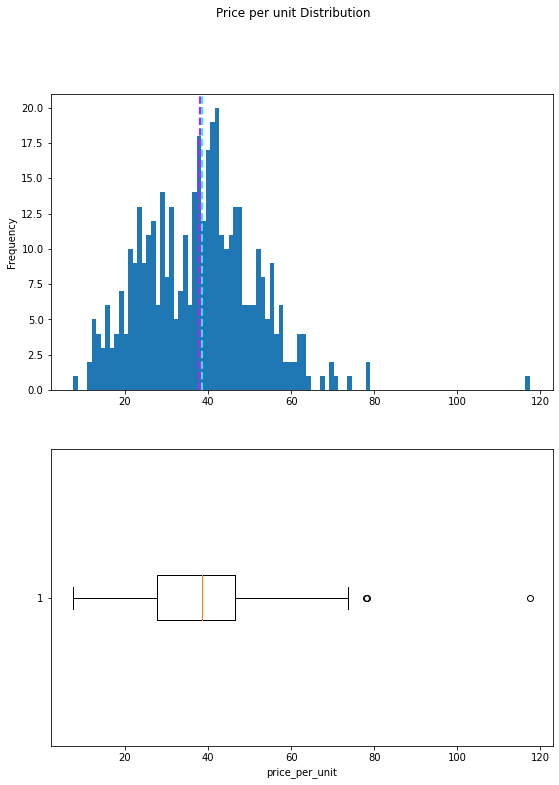

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

label = data['price_per_unit']
fig, ax = plt.subplots(2, 1, figsize = (9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('price_per_unit')
fig.suptitle('Price per unit Distribution')
fig.show()

In [132]:
# remove outliers
data = data[data['price_per_unit']<70]

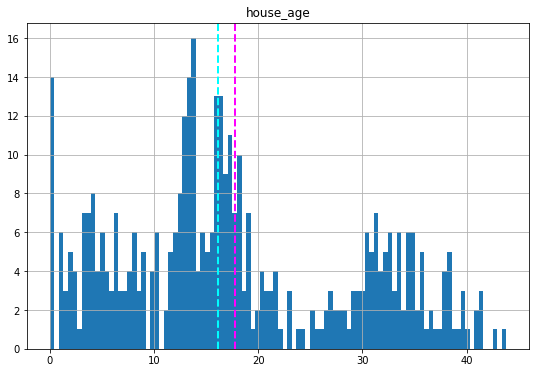

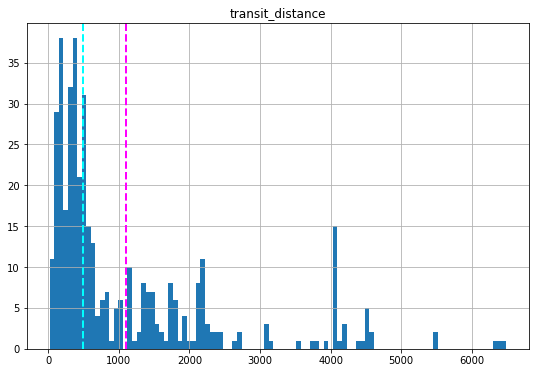

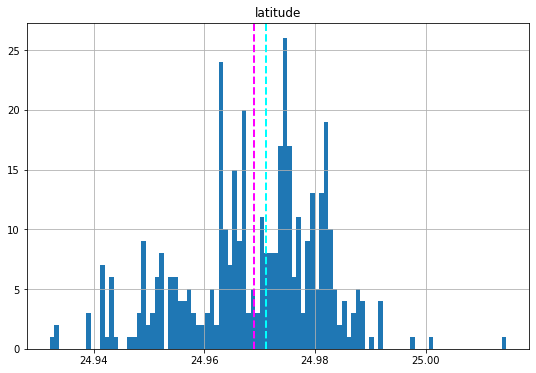

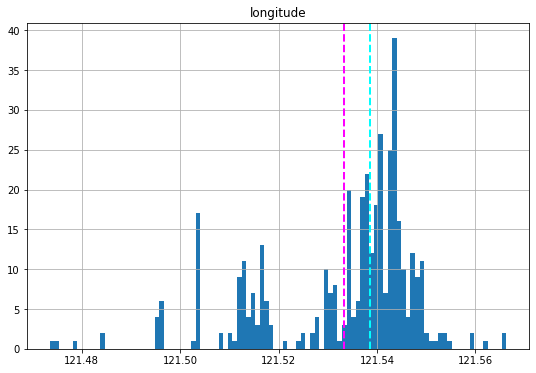

In [133]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

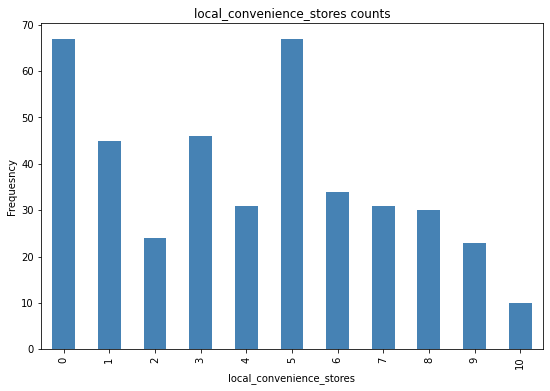

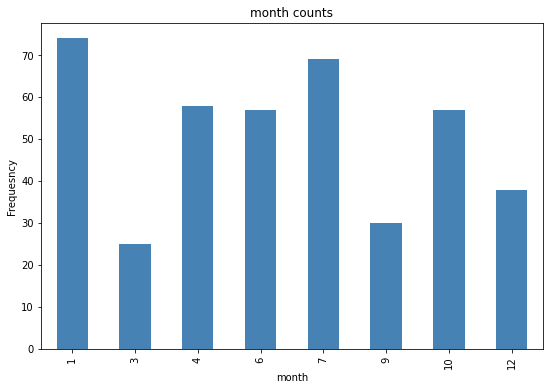

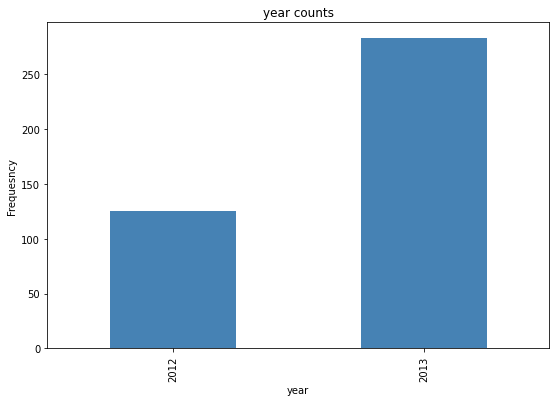

In [134]:
categorical_features = ['local_convenience_stores','month','year']
for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequesncy")
plt.show()

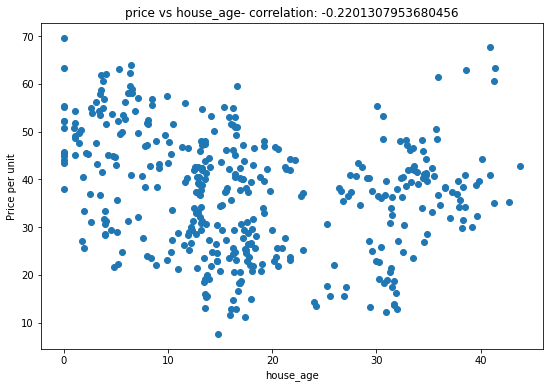

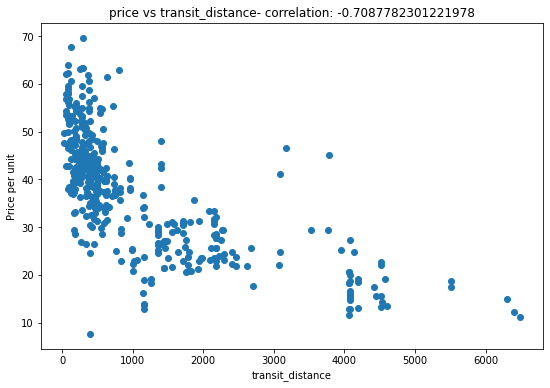

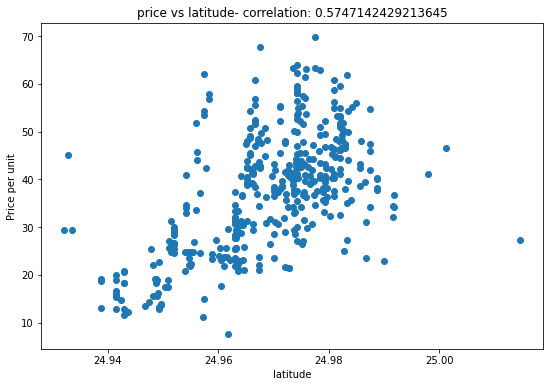

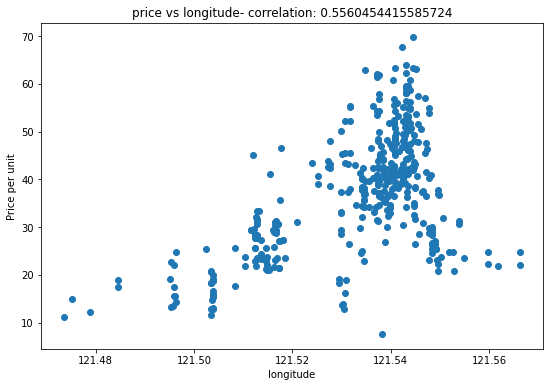

In [135]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per unit')
    ax.set_title('price vs '+ col + '- correlation: ' + str(correlation))
plt.show()

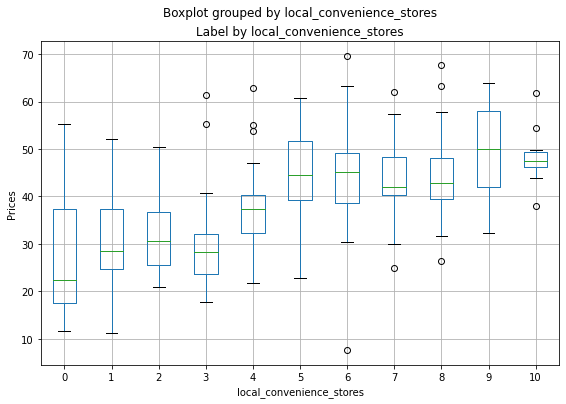

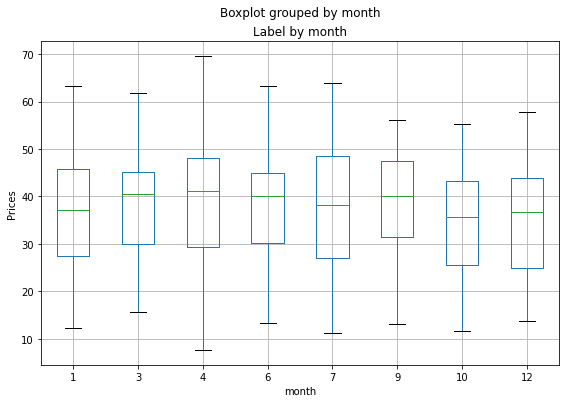

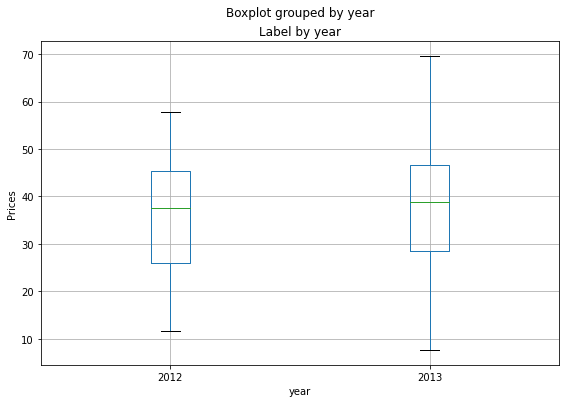

In [136]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Prices")
plt.show()

In [137]:
X, y = data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude', 'month', 'year']].values, data['price_per_unit'].values
print('Features:', X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  32.        84.87882   10.        24.98298  121.54024   12.
  2012.     ]
 [  19.5      306.5947     9.        24.98034  121.53951   12.
  2012.     ]
 [  13.3      561.9845     5.        24.98746  121.54391    7.
  2013.     ]
 [  13.3      561.9845     5.        24.98746  121.54391    7.
  2013.     ]
 [   5.       390.5684     5.        24.97937  121.54245   10.
  2012.     ]
 [   7.1     2175.03       3.        24.96305  121.51254    9.
  2012.     ]
 [  34.5      623.4731     7.        24.97933  121.53642    9.
  2012.     ]
 [  20.3      287.6025     6.        24.98042  121.54228    6.
  2013.     ]
 [  31.7     5512.038      1.        24.95095  121.48458    7.
  2013.     ]
 [  17.9     1783.18       3.        24.96731  121.51486    6.
  2013.     ]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('X_train shape: ',X_train.shape,'\nX_test shape: ',X_test.shape)

X_train shape:  (285, 7) 
X_test shape:  (123, 7)


In [139]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [140]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ', y_test[:10])

Predicted labels:  [45. 32. 45. 53. 43. 38. 43. 21. 50. 37.]
Actual labels:  [40.8 38.4 55.  44.9 45.7 28.5 39.3 24.7 63.2 40.6]


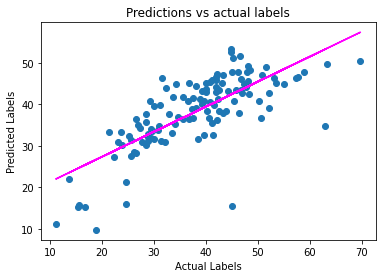

In [141]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs actual labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_test, predictions)
print('R2:', r2)

MSE: 52.87332358010236
RMSE: 7.271404512204114
R2: 0.5488295416452602


MSE: 55.921393716471876
RMSE: 7.478060825940899
R2: 0.5228202214927296


<function matplotlib.pyplot.show(close=None, block=None)>

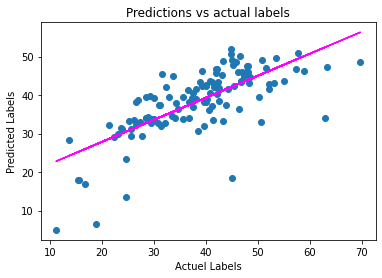

In [143]:
# Try Lasso
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actuel Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs actual labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show

In [144]:
# Try DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions[:10]

array([36.7, 47. , 47.1, 40.5, 44. , 37.3, 41.4, 22. , 53.7, 39. ])

MSE: 52.21680894308943
RMSE: 7.226119909265929
R2: 0.5544316106971323


<function matplotlib.pyplot.show(close=None, block=None)>

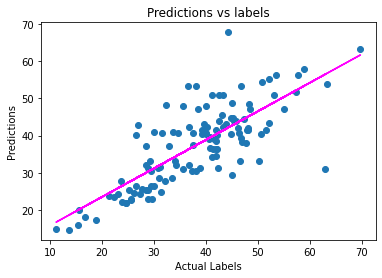

In [145]:
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show

In [112]:
# Lasso is the best one for now
# let's try another algorithm
# let's try GradientBoostingRegressor

MSE: 37.36215361132439
RMSE: 6.1124588842236305
R2: 0.6811870556159808


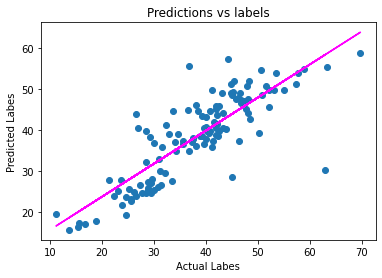

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labes')
plt.ylabel('Predicted Labes')
plt.title('Predictions vs labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [74]:
# GradientBoostingRegressor is better than Lasso
# let's try to optimize hyperparameters of GradientBoostingRegressor

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

alg = GradientBoostingRegressor()

params = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150]
}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print('Best parameters: ', gridsearch.best_params_, '\n')

model = gridsearch.best_estimator_
print(model, '\n')

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 



MSE: 35.35471277757681
RMSE: 5.945982910972483
R2: 0.6983166389248454


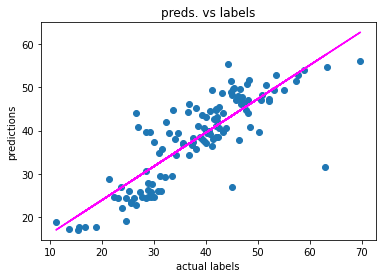

In [148]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('actual labels')
plt.ylabel('predictions')
plt.title('preds. vs labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [149]:
# Preprocess the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = [2,5,6]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', GradientBoostingRegressor())])

model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 5, 6])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 36.53484730438566
RMSE: 6.0444062822071825
R2: 0.688246497701853


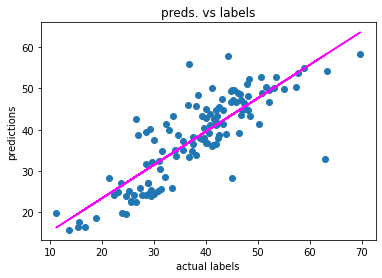

In [150]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('actual labels')
plt.ylabel('predictions')
plt.title('preds. vs labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [151]:
# try pipeline with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor())])
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 5, 6])])),
                ('regressor', RandomForestRegressor())])


MSE: 36.0553173567385
RMSE: 6.0046080102483375
R2: 0.6923383484051103


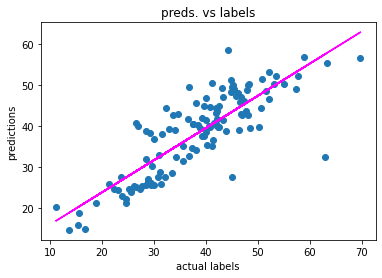

In [152]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('actual labels')
plt.ylabel('predictions')
plt.title('preds. vs labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [ ]:
# conclusion

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# Your code to use the trained model